<IPython.core.display.Javascript object>


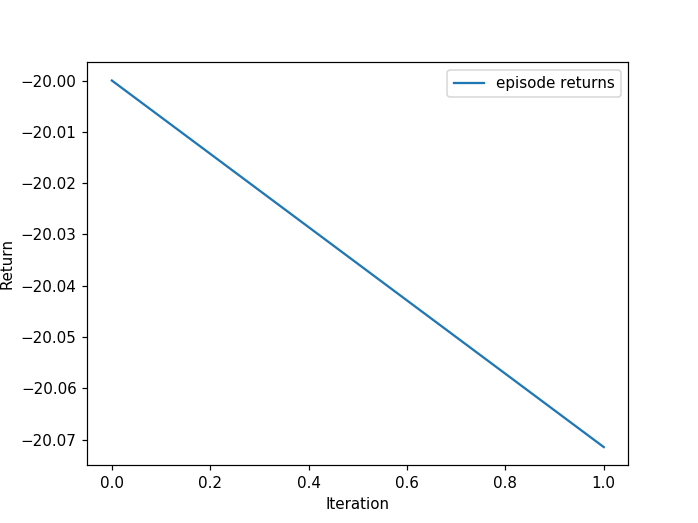

<IPython.core.display.Javascript object>


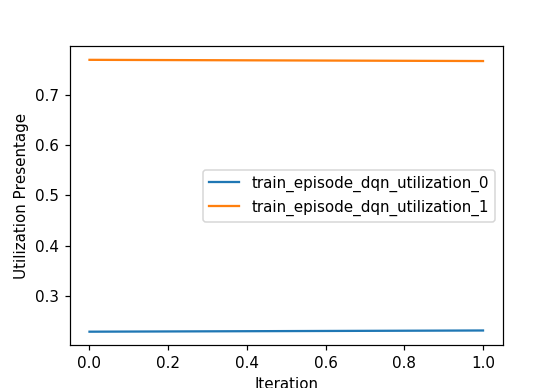

<IPython.core.display.Javascript object>


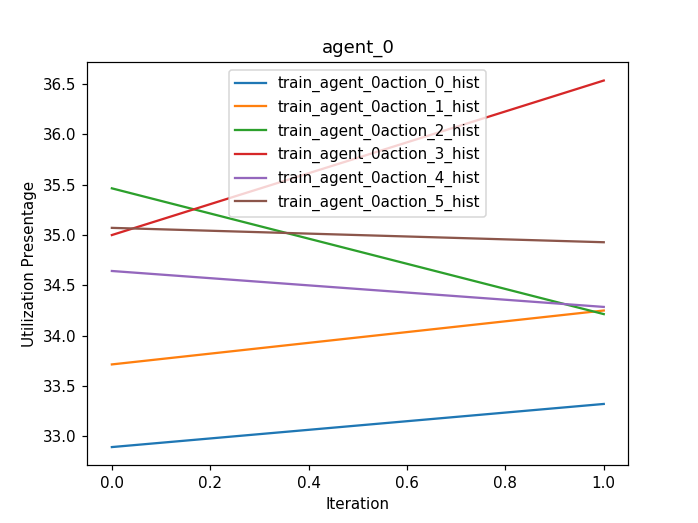

<IPython.core.display.Javascript object>


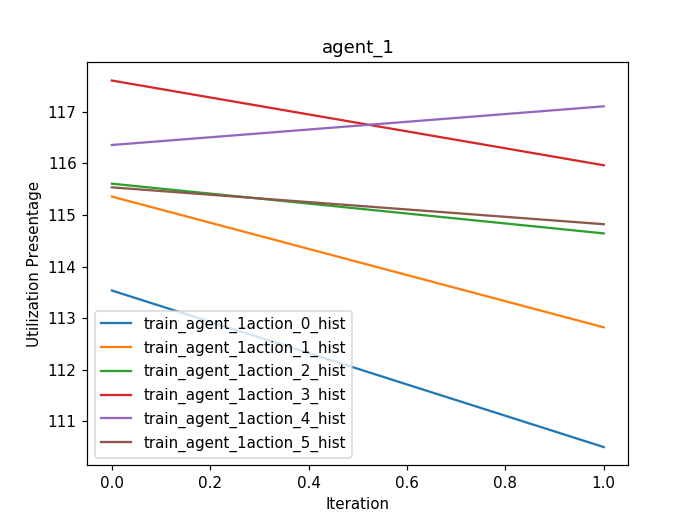

In [8]:
# @title Necessary imports and globals.
%matplotlib notebook

import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

BASE_PATH = './'  # @param
GAMES = ['cars']  # @param

import matplotlib.pyplot as plt

for game in GAMES:
    # Use our provided colab utils to load this log file. The second returned 
  
    #raw_data, _ = colab_utils.load_statistics(
    #    'LOGS/logs'.format(game), verbose=False)
    raw_data, _ = colab_utils.load_statistics(
                             'LOGS/logs'.format(game), verbose=False)
    summarized_data = colab_utils.summarize_data(
                                 raw_data, ['train_episode_returns'])
    plt.plot(summarized_data['train_episode_returns'], label='episode returns')
    plt.plot()
    plt.xlabel('Iteration')
    plt.ylabel('Return')
    plt.legend()
    plt.show()
    
    
    #  train_episode_dqn_utilization
    N = 2
    plt.figure()
    
    for i in range (N):
        
        name_of_data = 'train_episode_dqn_utilization_' + str(i)
        summarized_data_two = colab_utils.summarize_data( raw_data, [name_of_data])

        plt.plot( summarized_data_two[name_of_data], label=name_of_data )
    
    plt.xlabel('Iteration')
    plt.ylabel('Utilization Presentage')
    
    plt.legend()
    plt.show()
    
    
    #show hist
    A = 6 
    for agent in range( N ):
        plt.figure()
        for action in range( A ):
            name_of_data = '{}_agent_{:d}action_{:d}_hist'.format( "train", agent, action )
            summarized_data_two = colab_utils.summarize_data( raw_data, [name_of_data])
            plt.plot( summarized_data_two[name_of_data], label=name_of_data )
                
        plt.xlabel('Iteration')
        plt.ylabel('Utilization Presentage')
    
        plt.legend()
        plt.title('agent_{:d}'.format(agent))
        plt.show()
        
#     for i in range (N):
#         plt.figure()
        
        
    
#         plt.plot( tmp_hist, label=name_of_data )
    
#     plt.xlabel('Iteration')
#     plt.ylabel('Utilization Presentage')
    
#     plt.legend()
#     plt.show()

    
    
    
    
    
    
    